## Remove outliers
Imagine we have some data from normal distribution and we want to see are there some outliers.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

In [2]:
#we create a function that will remove selected percentage of top and bottom cases and made replace with median values
def remove_outliers(df, tf: str, bottom:float, top:float):
    # remove outliers
    maxi = df[tf].quantile(top)
    mini = df[tf].quantile(bottom)
    median=df[tf].median()
    
    # fill outliers with median
    df['outlier'] = ~df[tf].between(mini, maxi)
    df[tf+'_without_outlier'] = np.where(df['outlier'] == True, median,  df[tf])
    return df

In [3]:
boston =load_boston()
names=list(boston['feature_names'])
X=boston['data']
df = pd.DataFrame(X, columns=names)
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


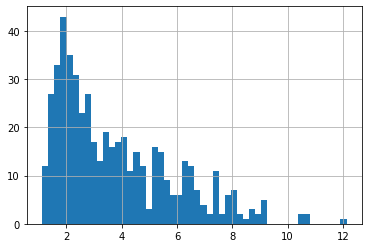

In [29]:
df['DIS'].hist(bins=50);

In [30]:
df = remove_outliers(df, 'DIS', 0.01, 0.98)

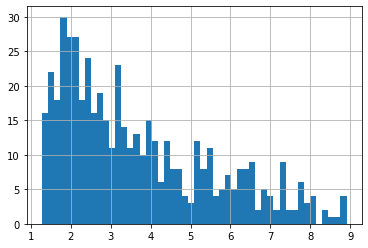

In [32]:
df['DIS_without_outlier'].hist(bins=50);